# Trees and forests

*This notebook first appeared as a part of [GHBD]().*

*License: [MIT](http://opensource.org/licenses/MIT)*

*(C) 2016, Tim Head.*
*Feel free to use, distribute, and modify with the above attribution.*

# Machine-learning

Historical data can be used to "learn" a model of fairly
complex processes. Once this model has been learnt from
historical data it can be applied to new data for which
the outcome is not yet known. We make predictions.

> For example using today's air temperature, precipitation,
> wind speed and wind direction we could predict whether or
> not it will rain tomorrow or what the temperature will be.

## Ideas for applications

* email classification: spam or ham?
* will a grant be successful or not?
* is this grant likely to over-/underspend?
* will this piece of equipment/pump/oven break soon?
* how many refugees will arrive tomorrow?
* recognising cats in pictures
* identifying body parts with Kinect cameras


# Python stack for data analysis

- The __open source__ Python ecosystem provides __a standalone, versatile and powerful scientific working environment__, including: [NumPy](http://numpy.org), [SciPy](http://scipy.org), [IPython](http://ipython.org), [Matplotlib](http://matplotlib.org), [Pandas](http://pandas.pydata.org/), _and many others..._

<center> 
<img src="img/scikit-learn-logo.png" style="max-width: 120px; display: inline" />
<img src="img/numpy-logo.png" style="max-width: 120px; display: inline" />
<img src="img/scipy-logo.png" style="max-width: 120px; display: inline" />
<img src="img/ipython-logo.jpg" style="max-width: 120px; display: inline" />
<img src="img/matplotlib-logo.png" style="max-width: 120px; display: inline"/>
<img src="img/pandas-logo.png" style="max-width: 120px; display: inline" />
</center>

# Scikit-learn

Today's tool of choice!

* Machine learning library written in __Python__
* __Simple and efficient__, for both experts and __non-experts__
* Classical, __well-established machine learning algorithms__
* Shipped with <a href="http://scikit-learn.org/dev/documentation.html">documentation</a> and <a href="http://scikit-learn.org/dev/auto_examples/index.html">examples</a>
* __BSD 3 license__
* Community driven development
 - 20~ core developers (mostly researchers)
 - 500+ occasional contributors
 - __All working publicly together__ on [GitHub](https://github.com/scikit-learn/scikit-learn)
 - Emphasis on __keeping the project maintainable__

In [9]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14

from sklearn.datasets import make_blobs

#
# Generate some toy data to keep things simple
#

X, y = make_blobs(n_samples=1000, centers=20, random_state=42)
labels = ["b", "r"]
y = np.take(labels, (y < 10))
print(X) 
print(y[:5])

[[  4.20578296  -0.55173454]
 [  2.31387979  -8.49311501]
 [ -3.54648183   0.10178982]
 ..., 
 [ -9.63440684  10.06369286]
 [ -3.6259865    2.95042877]
 [  3.85662554   1.65110817]]
['b' 'b' 'r' 'r' 'b']


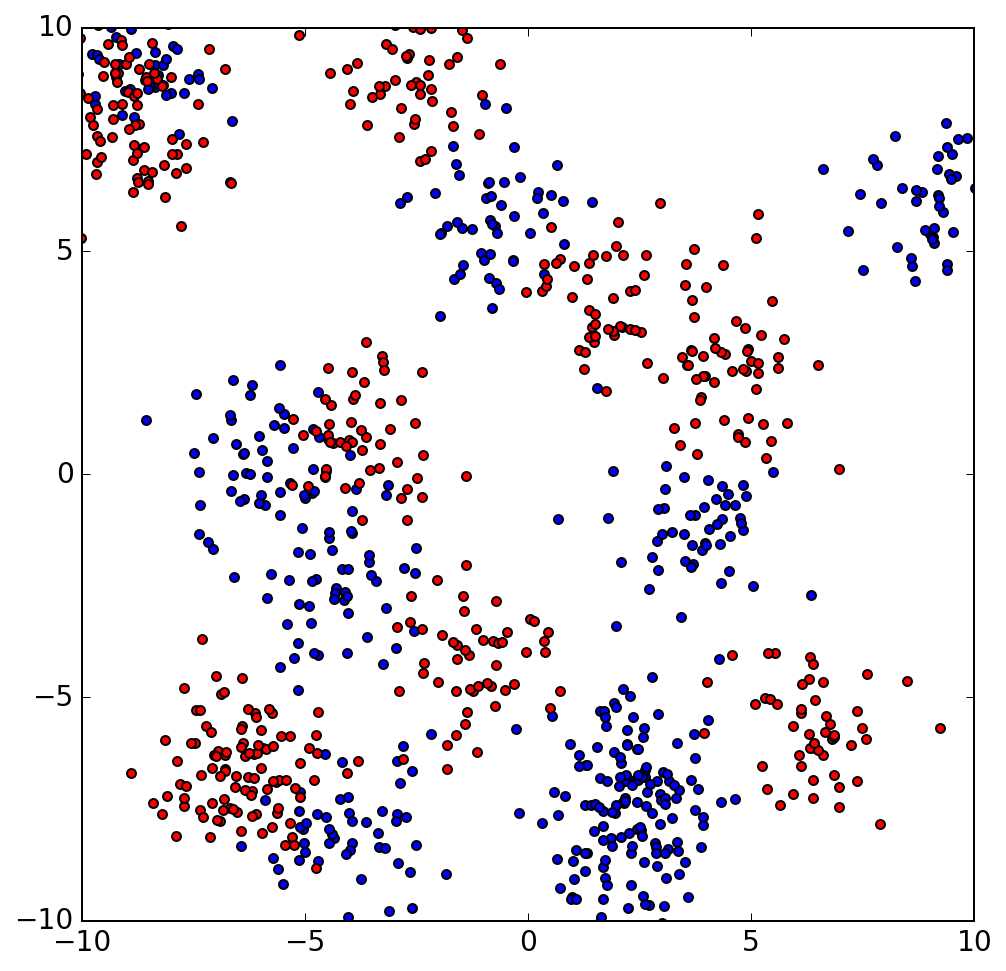

In [10]:
# Plot
plt.figure()
for label in labels:
    mask = (y == label)
    plt.scatter(X[mask, 0], X[mask, 1], c=label)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

In [11]:
# Import the nearest neighbor class
from sklearn.neighbors import KNeighborsClassifier

# Set hyper-parameters, to control the algorithms behaviour
clf = KNeighborsClassifier(n_neighbors=5)

# Learn a model from the training data
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

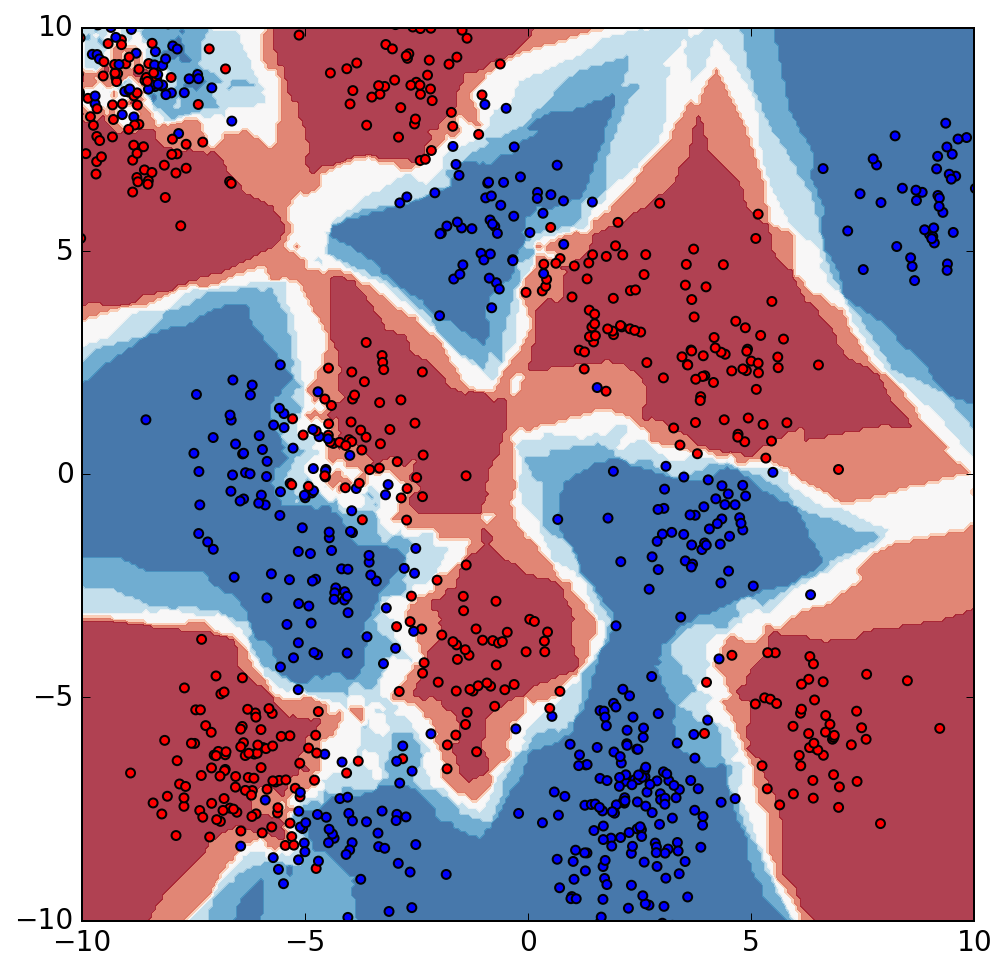

In [12]:
from utils import plot_surface

plot_surface(clf, X, y)

# Decision trees

`scikit-learn` implements many different classifiers. Each with
its own strengths and weaknesses. They all follow the same interface
which makes it simple to change and explore different options.

Take a look at the documentation, it is excellent.

Today we will focus on decision trees and related models. They
are amongst the best general purpose estimators. They are
robust and flexible when it comes to weird things in your
input data, can handle mixtures of data types, and are
conceptually easy to understand.

<img src="img/tree-simple.png" style="max-width: 500px;"/>
<img src="img/tree-partition.png" style="max-width: 300px;"/>

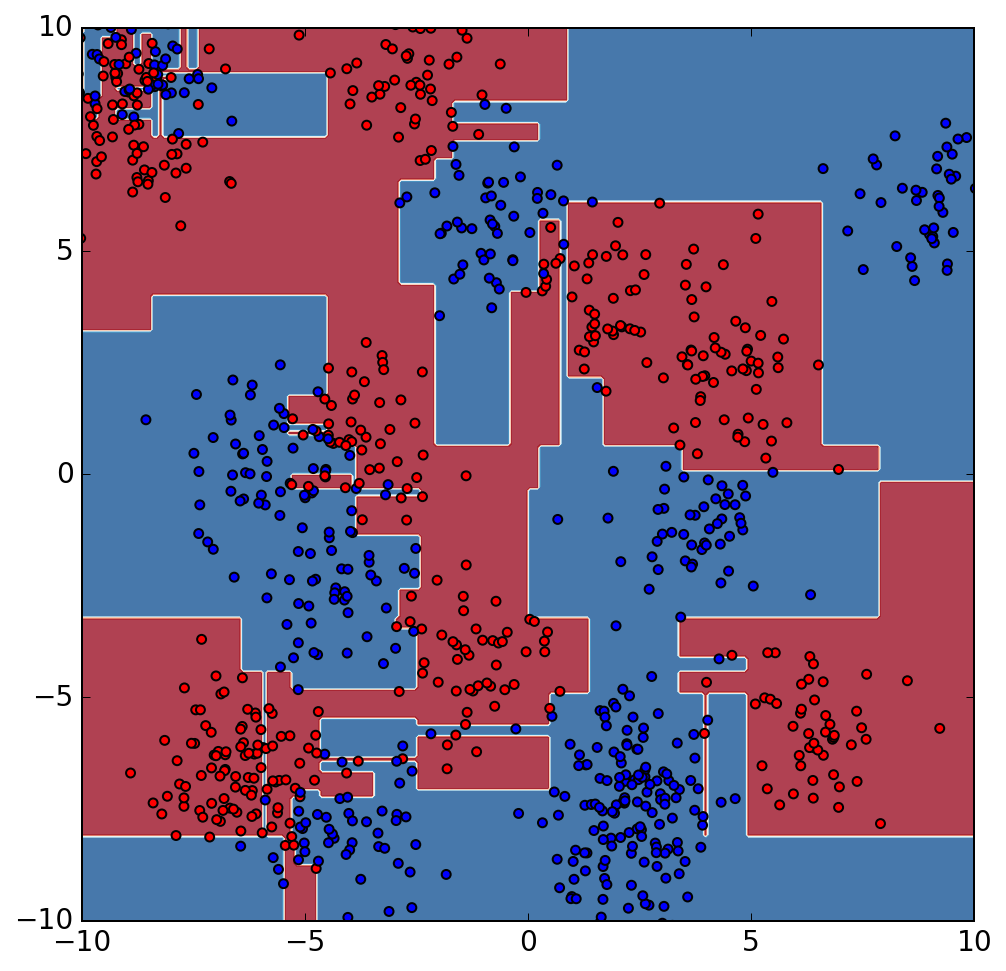

In [13]:
from sklearn.tree import DecisionTreeClassifier 

clf = DecisionTreeClassifier()
clf.fit(X, y)
plot_surface(clf, X, y)

In [14]:
from utils import draw_tree

draw_tree(clf, ['one', 'two'], max_depth=3, filled=True)

# Forests

A single decision tree is nice, however limited in its performance. Similar to the "wisdom
of crowds" a technique that works very well is combining lots of individual decision
trees into a **forest**.

> At a 1906 country fair in Plymouth, 800 people participated in a contest to estimate the
> weight of a slaughtered and dressed ox. Statistician Francis Galton observed that
> the median guess, 1207 pounds, was accurate within 1% of the true weight of 1198 pounds.

Concretely we will use a **random forest**. Split your data into random sub-samples and 
construct a decision tree on each part. Then take the average all trees as the
output of the random forest.

<img src="img/forest.png" style="max-width: 500px;"/>

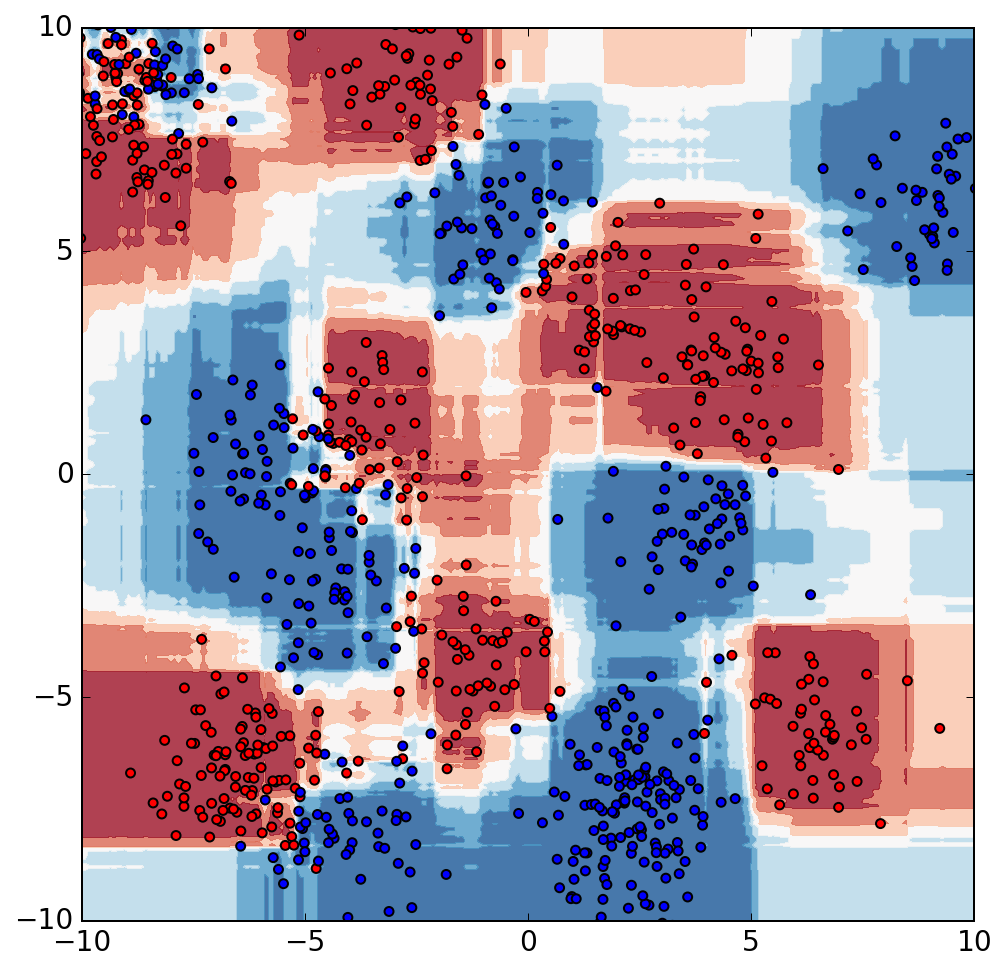

In [15]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100).fit(X, y)
plot_surface(clf, X, y)